In [1]:
%load_ext autoreload
%autoreload 2
%timeit

    
import numpy as np
import matplotlib.pyplot as plt
from lanmm_helpers import *
from lanmm_analyzer import *
from lanmmv11 import *


In [2]:
min_grid = 50
max_grid = 501
fine_scale = 50 #20
mu_p1_values=  range(min_grid, max_grid, fine_scale)
mu_p2_values=  range(min_grid, max_grid, fine_scale)

tmax = 33 #93.0
dt = 0.001
discard = 3.0
alpha_band=(2,15)
gamma_band=(20,60)

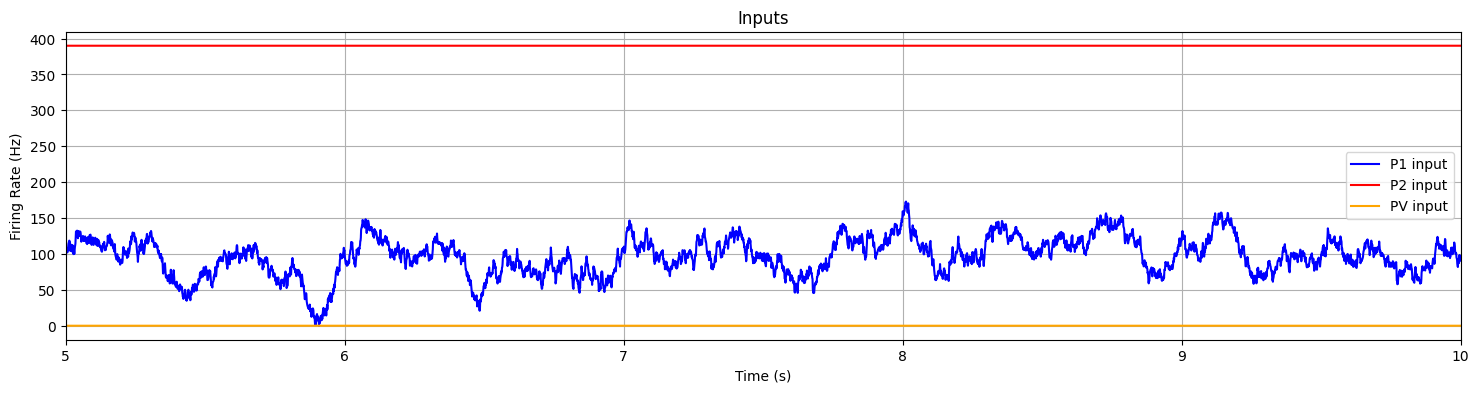

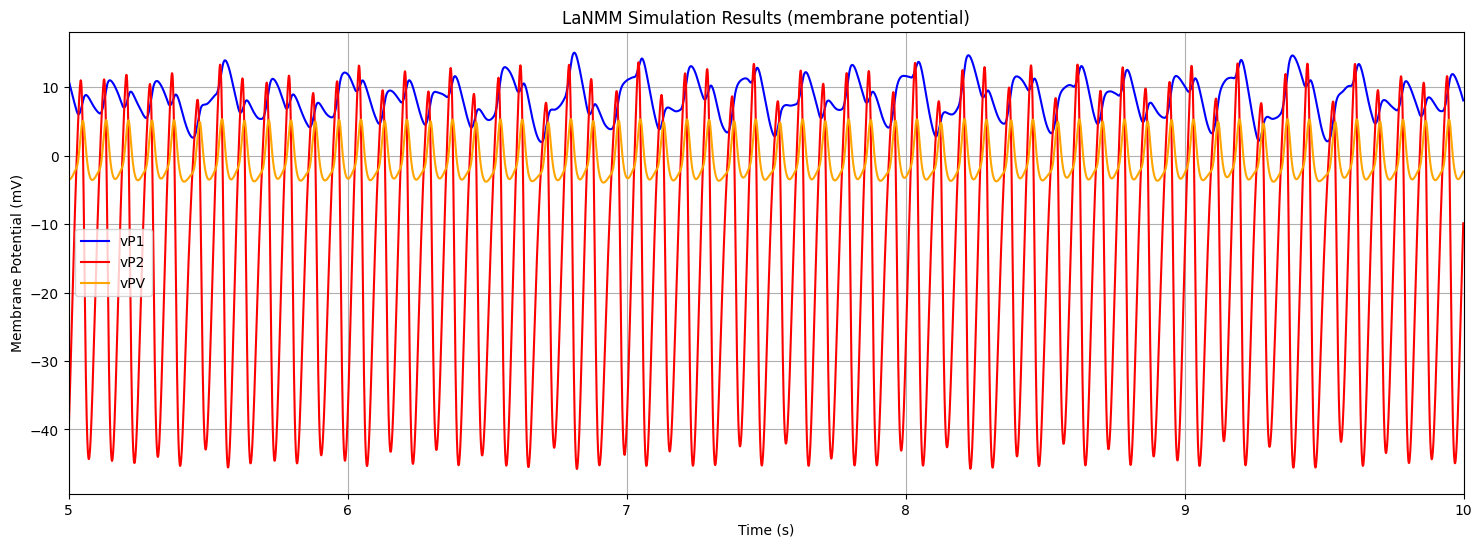

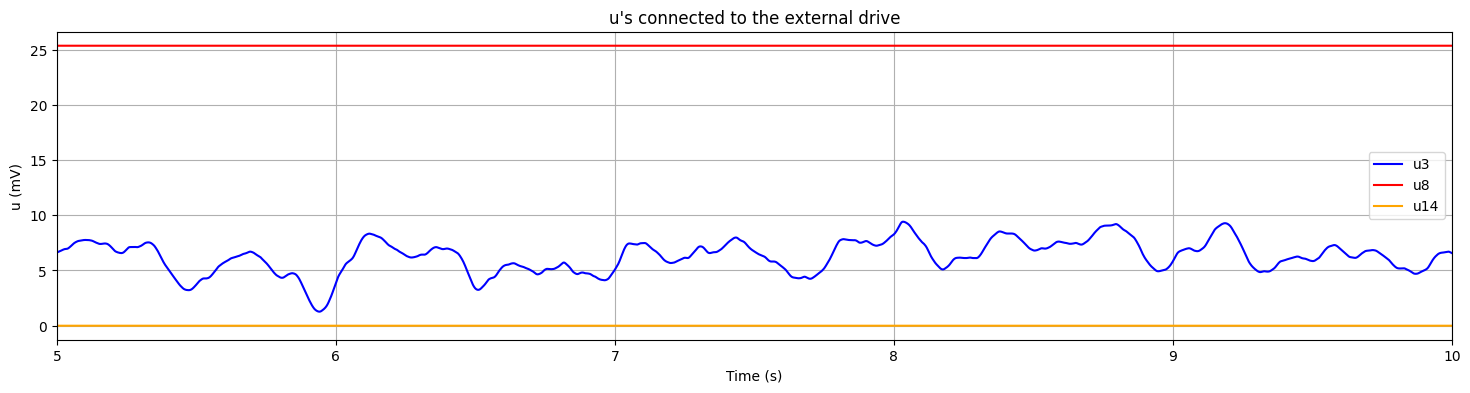

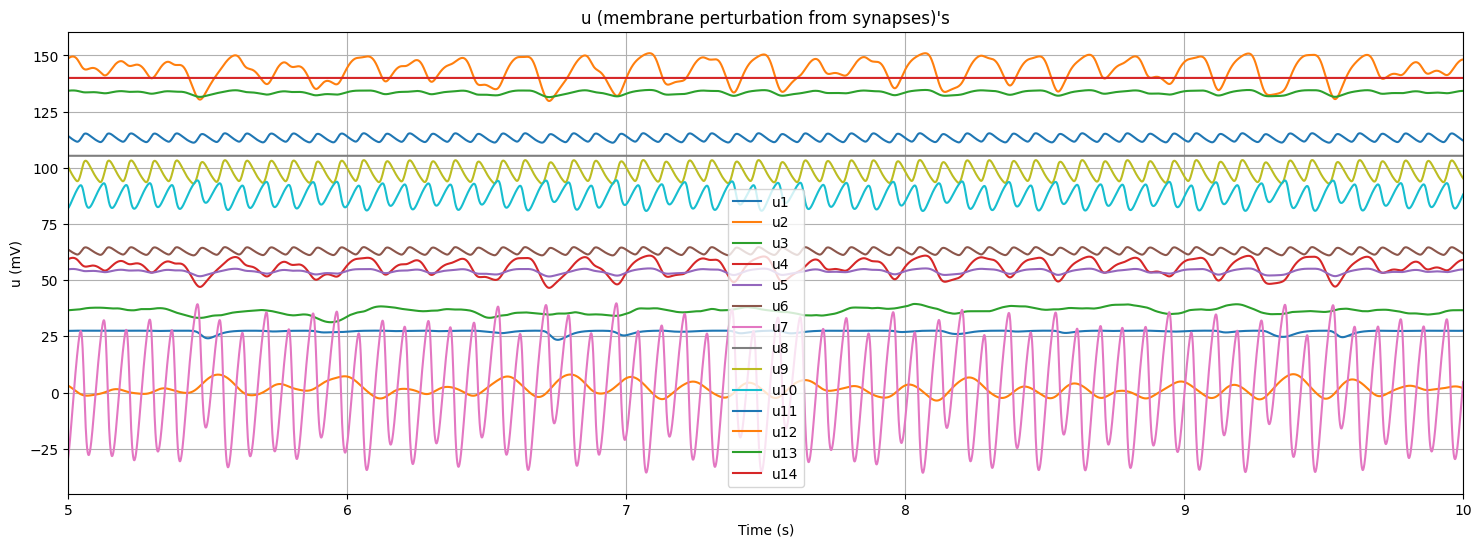

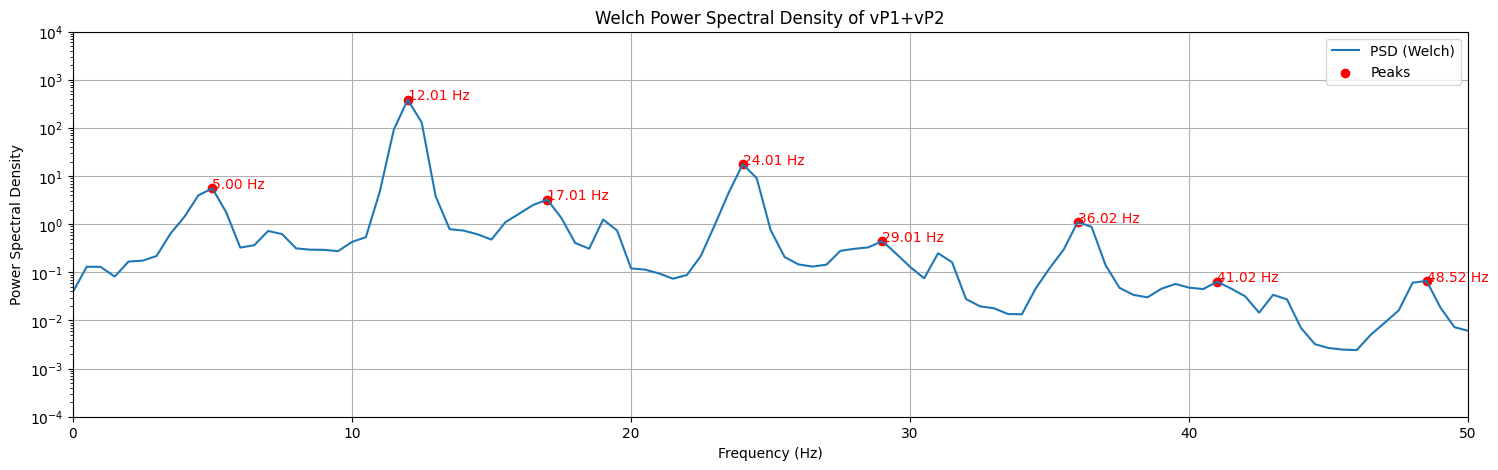

In [14]:
# Let's create a demo of how to run a simulation with an am signal and then plot the results, 
# peak frequency, and spectrum.


warp=0.5
warp_fast = 0.2


intrinsic_params = {
        'A_AMPA': 3.25,
        'a_AMPA': 100.0 * warp,
        'A_GABA_slow': -22.0,
        'a_GABA_slow': 50.0 * warp,
        'A_GABA_fast': -30.0,
        'a_GABA_fast': 220.0 *warp_fast,
        'C_vals': {
            1: 108.0,
            2: 33.7,
            3: 1.0,       # External drive for P1 is injected here.
            4: 135.0,
            5: 33.75,
            6: 70.0,
            7: 550.0,
            8: 1.0,       # External drive for P2 is injected here.
            9: 200.0,
            10: 100.0,
            11: 80.0,
            12: 200.0,
            13: 30.0,
            14: 1.0       # External drive for PV is injected here.
        },
        'syn_types': {
            1: 'AMPA',
            2: 'GABA_slow',
            3: 'AMPA',
            4: 'AMPA',
            5: 'AMPA',
            6: 'AMPA',
            7: 'GABA_fast',
            8: 'AMPA',
            9: 'AMPA',
            10: 'GABA_fast',
            11: 'AMPA',
            12: 'AMPA',
            13: 'AMPA',
            14: 'AMPA'
        },
        'v0_default': 6.0,
        'v0_p2': 1.0,
        'fmax': 5.0 * warp,
        'r_slope': 0.56,
        'include_PV_drive': True
    }

driving_params = configure_driving_params(e1_config='multiscale')
driving_params['e1']['mu']=100
driving_params['e2']['mu']=390

# run the simulation
sim_results = run_unified_simulation(intrinsic_params, driving_params, tmax=10.0, dt=0.001, discard=1.0)

# create a directory to save the results with a timestamped name
# then save the driving params and intrinsic params to a file and 
# then plot the figures and save them too to the folder
import os
from datetime import datetime
import json

# Create timestamped directory name
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
results_dir = f'results_{timestamp}'

# Create directory
os.makedirs(results_dir, exist_ok=True)

# Save parameters to JSON files
params_to_save = {
    'intrinsic_params': intrinsic_params,
    'driving_params': driving_params
}

for param_name, param_dict in params_to_save.items():
    param_file = os.path.join(results_dir, f'{param_name}.json')
    with open(param_file, 'w') as f:
        json.dump(param_dict, f, indent=4)

# Plot and save figures
plot_sim_results(sim_results, save_path=os.path.join(results_dir, ''), show=True)


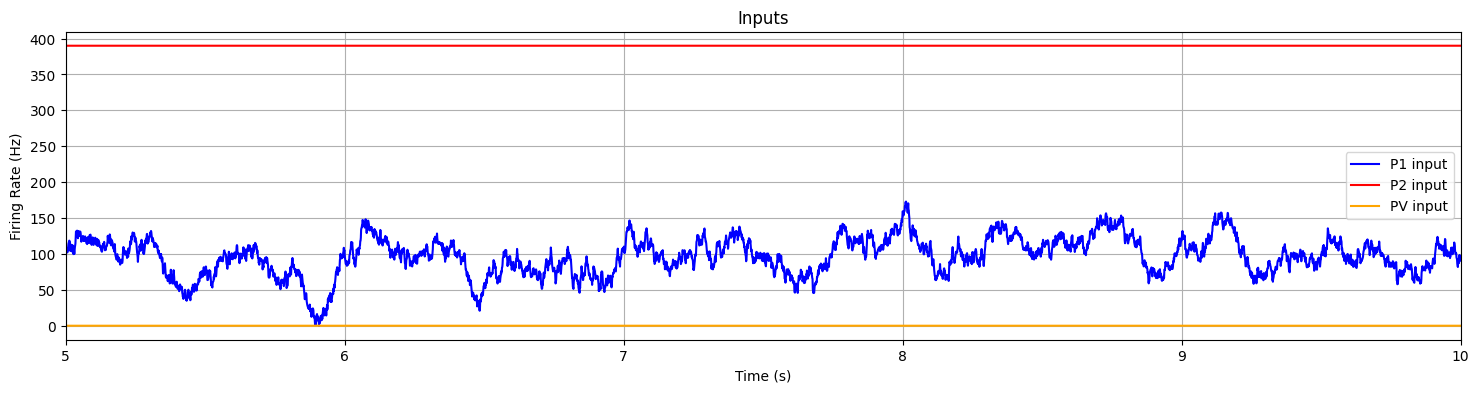

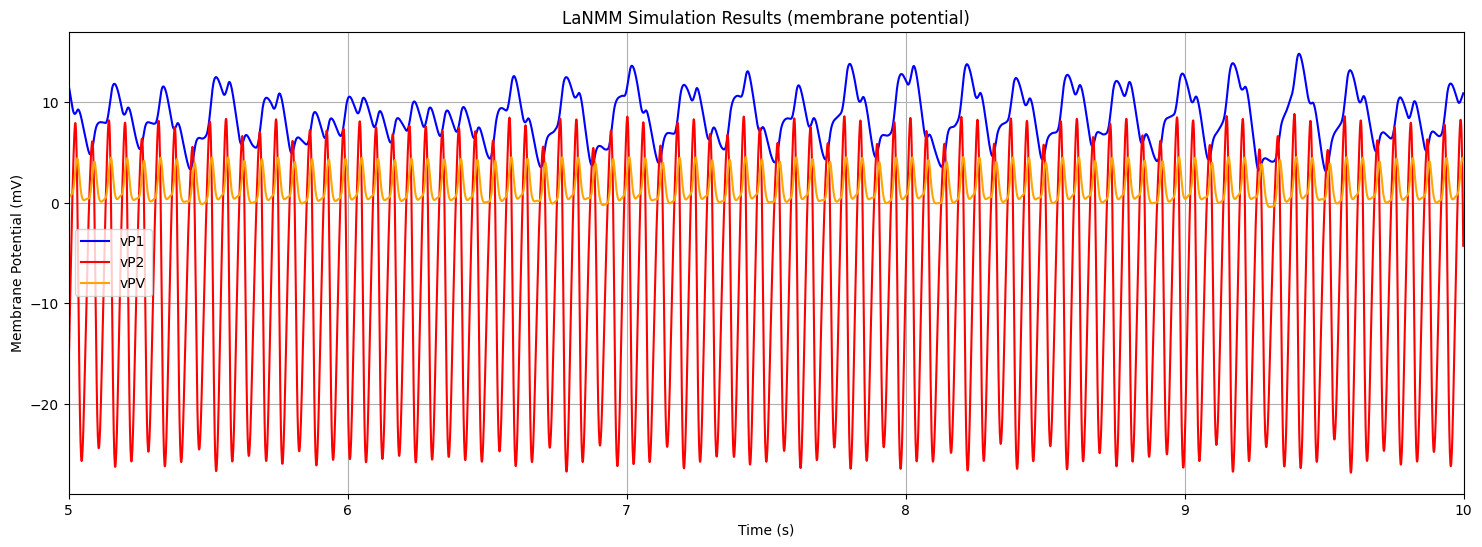

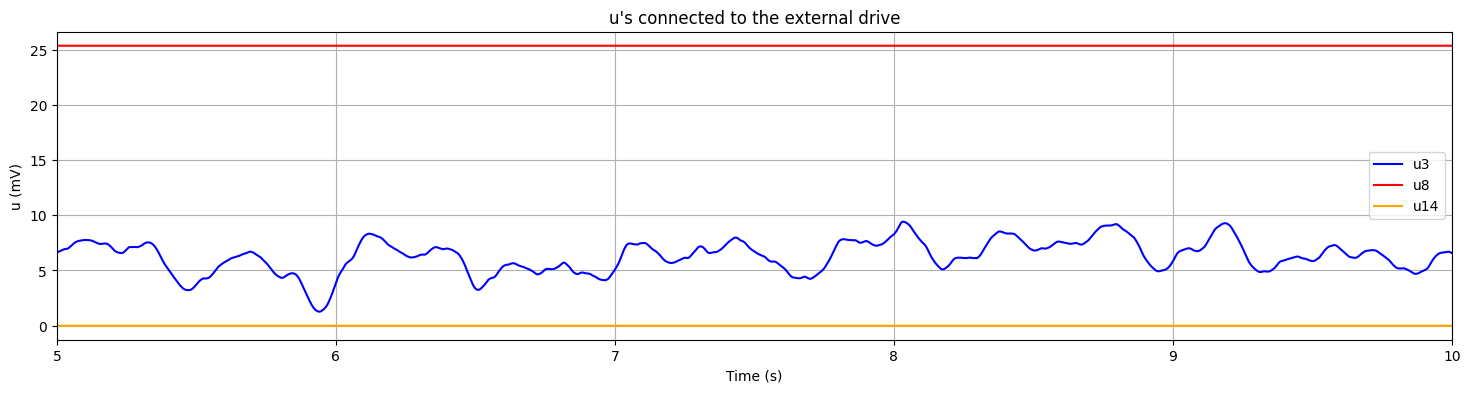

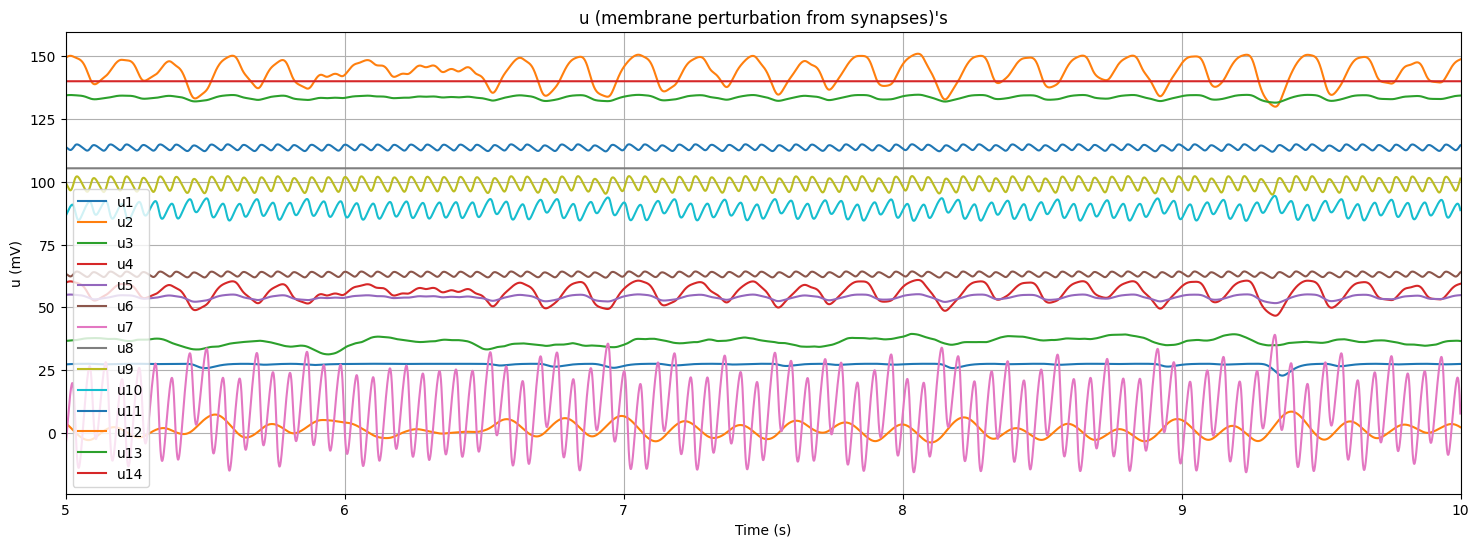

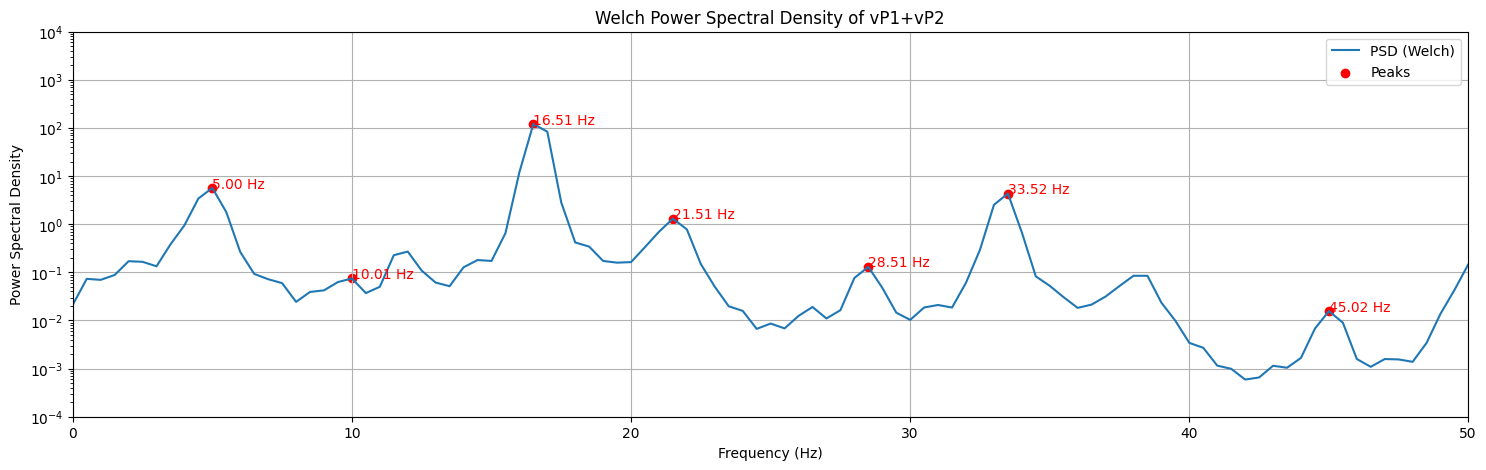

In [15]:
# Let's create a demo of how to run a simulation with an am signal and then plot the results, 
# peak frequency, and spectrum.


warp=0.5
warp_fast = 0.3


intrinsic_params = {
        'A_AMPA': 3.25,
        'a_AMPA': 100.0 * warp,
        'A_GABA_slow': -22.0,
        'a_GABA_slow': 50.0 * warp,
        'A_GABA_fast': -30.0,
        'a_GABA_fast': 220.0 *warp_fast,
        'C_vals': {
            1: 108.0,
            2: 33.7,
            3: 1.0,       # External drive for P1 is injected here.
            4: 135.0,
            5: 33.75,
            6: 70.0,
            7: 550.0,
            8: 1.0,       # External drive for P2 is injected here.
            9: 200.0,
            10: 100.0,
            11: 80.0,
            12: 200.0,
            13: 30.0,
            14: 1.0       # External drive for PV is injected here.
        },
        'syn_types': {
            1: 'AMPA',
            2: 'GABA_slow',
            3: 'AMPA',
            4: 'AMPA',
            5: 'AMPA',
            6: 'AMPA',
            7: 'GABA_fast',
            8: 'AMPA',
            9: 'AMPA',
            10: 'GABA_fast',
            11: 'AMPA',
            12: 'AMPA',
            13: 'AMPA',
            14: 'AMPA'
        },
        'v0_default': 6.0,
        'v0_p2': 1.0,
        'fmax': 5.0 * warp,
        'r_slope': 0.56,
        'include_PV_drive': True
    }

driving_params = configure_driving_params(e1_config='multiscale')
driving_params['e1']['mu']=100
driving_params['e2']['mu']=390

# run the simulation
sim_results = run_unified_simulation(intrinsic_params, driving_params, tmax=10.0, dt=0.001, discard=1.0)

# create a directory to save the results with a timestamped name
# then save the driving params and intrinsic params to a file and 
# then plot the figures and save them too to the folder
import os
from datetime import datetime
import json

# Create timestamped directory name
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
results_dir = f'results_{timestamp}'

# Create directory
os.makedirs(results_dir, exist_ok=True)

# Save parameters to JSON files
params_to_save = {
    'intrinsic_params': intrinsic_params,
    'driving_params': driving_params
}

for param_name, param_dict in params_to_save.items():
    param_file = os.path.join(results_dir, f'{param_name}.json')
    with open(param_file, 'w') as f:
        json.dump(param_dict, f, indent=4)

# Plot and save figures
plot_sim_results(sim_results, save_path=os.path.join(results_dir, ''), show=True)


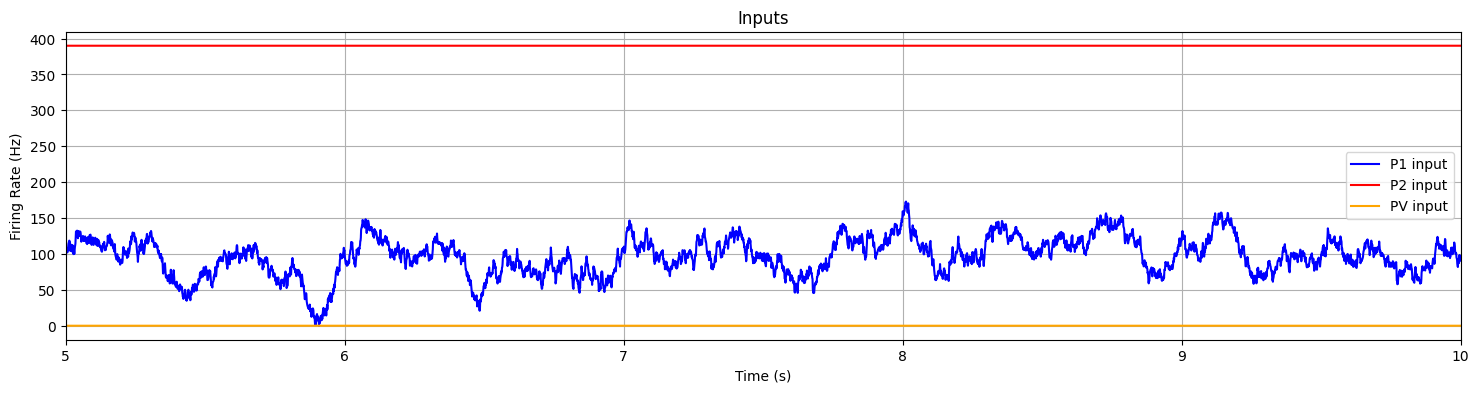

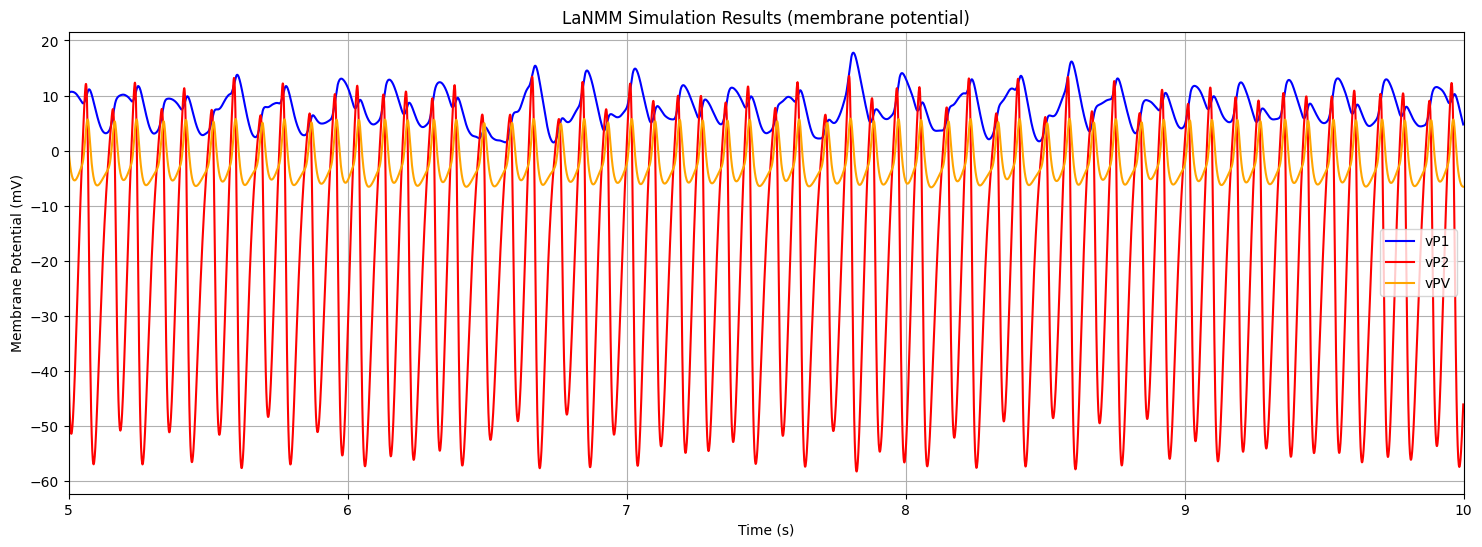

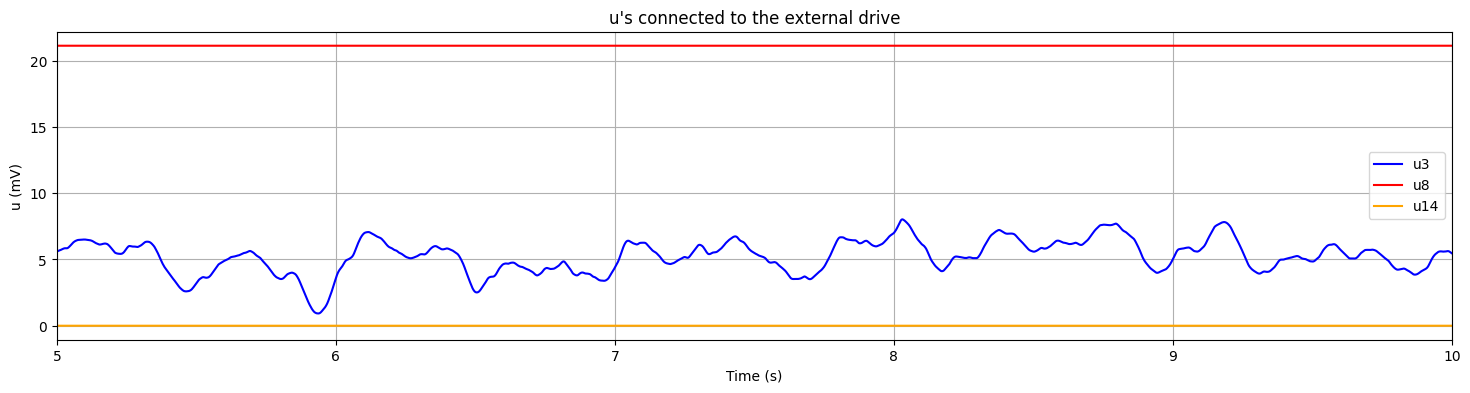

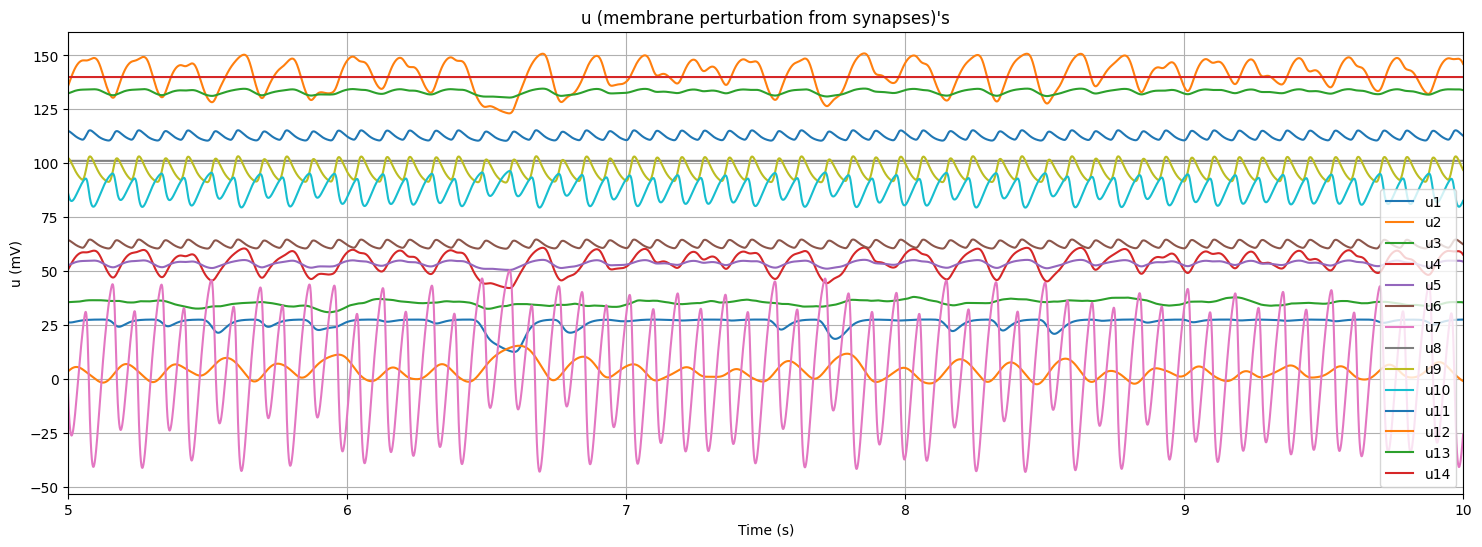

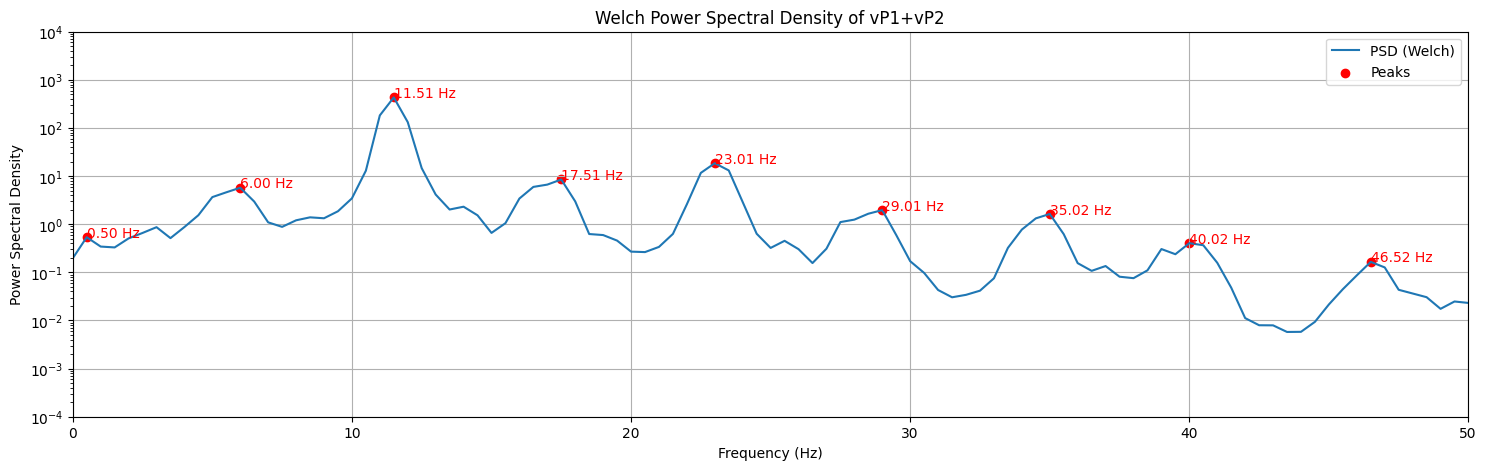

In [16]:
# Let's create a demo of how to run a simulation with an am signal and then plot the results, 
# peak frequency, and spectrum.


warp=0.6
warp_fast = 0.2


intrinsic_params = {
        'A_AMPA': 3.25,
        'a_AMPA': 100.0 * warp,
        'A_GABA_slow': -22.0,
        'a_GABA_slow': 50.0 * warp,
        'A_GABA_fast': -30.0,
        'a_GABA_fast': 220.0 *warp_fast,
        'C_vals': {
            1: 108.0,
            2: 33.7,
            3: 1.0,       # External drive for P1 is injected here.
            4: 135.0,
            5: 33.75,
            6: 70.0,
            7: 550.0,
            8: 1.0,       # External drive for P2 is injected here.
            9: 200.0,
            10: 100.0,
            11: 80.0,
            12: 200.0,
            13: 30.0,
            14: 1.0       # External drive for PV is injected here.
        },
        'syn_types': {
            1: 'AMPA',
            2: 'GABA_slow',
            3: 'AMPA',
            4: 'AMPA',
            5: 'AMPA',
            6: 'AMPA',
            7: 'GABA_fast',
            8: 'AMPA',
            9: 'AMPA',
            10: 'GABA_fast',
            11: 'AMPA',
            12: 'AMPA',
            13: 'AMPA',
            14: 'AMPA'
        },
        'v0_default': 6.0,
        'v0_p2': 1.0,
        'fmax': 5.0 * warp,
        'r_slope': 0.56,
        'include_PV_drive': True
    }

driving_params = configure_driving_params(e1_config='multiscale')
driving_params['e1']['mu']=100
driving_params['e2']['mu']=390

# run the simulation
sim_results = run_unified_simulation(intrinsic_params, driving_params, tmax=10.0, dt=0.001, discard=1.0)

# create a directory to save the results with a timestamped name
# then save the driving params and intrinsic params to a file and 
# then plot the figures and save them too to the folder
import os
from datetime import datetime
import json

# Create timestamped directory name
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
results_dir = f'results_{timestamp}'

# Create directory
os.makedirs(results_dir, exist_ok=True)

# Save parameters to JSON files
params_to_save = {
    'intrinsic_params': intrinsic_params,
    'driving_params': driving_params
}

for param_name, param_dict in params_to_save.items():
    param_file = os.path.join(results_dir, f'{param_name}.json')
    with open(param_file, 'w') as f:
        json.dump(param_dict, f, indent=4)

# Plot and save figures
plot_sim_results(sim_results, save_path=os.path.join(results_dir, ''), show=True)


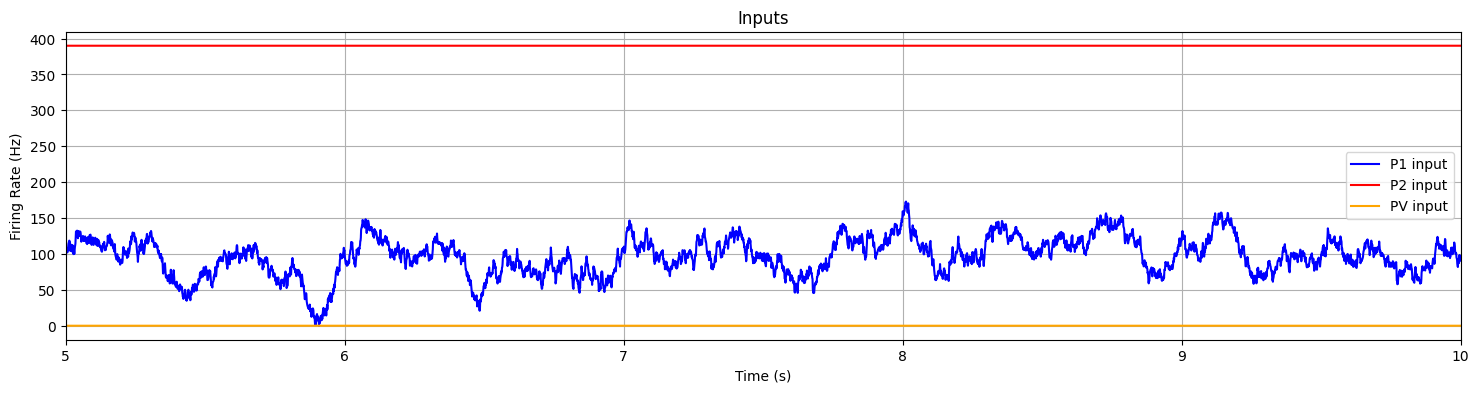

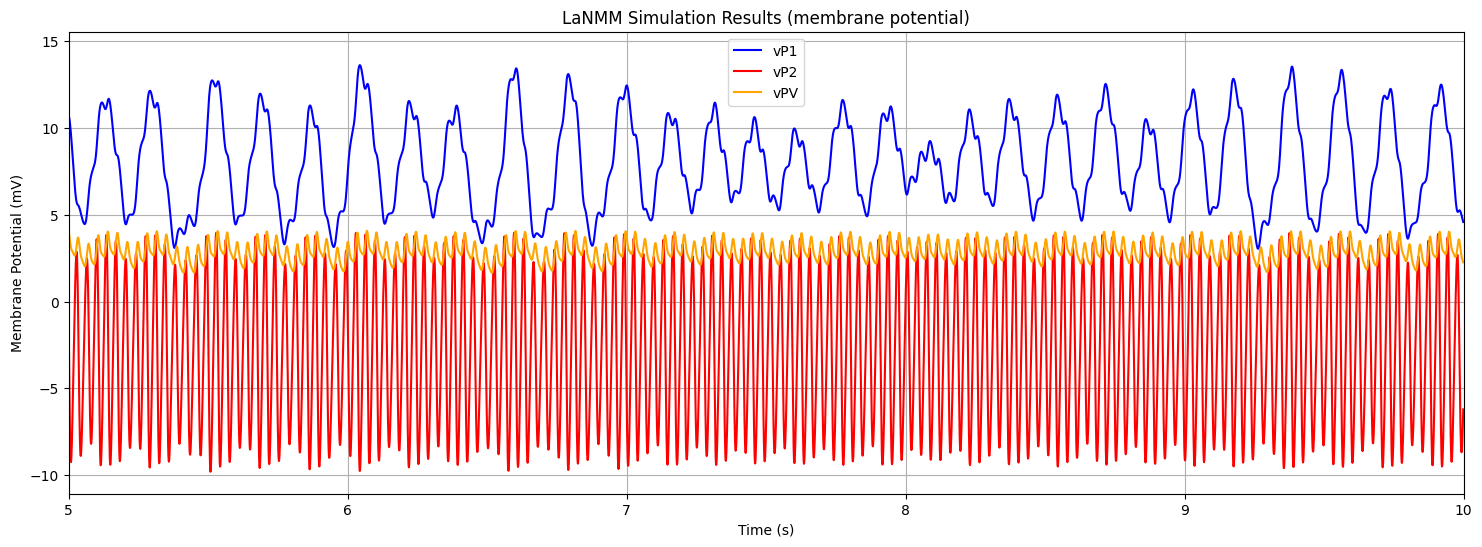

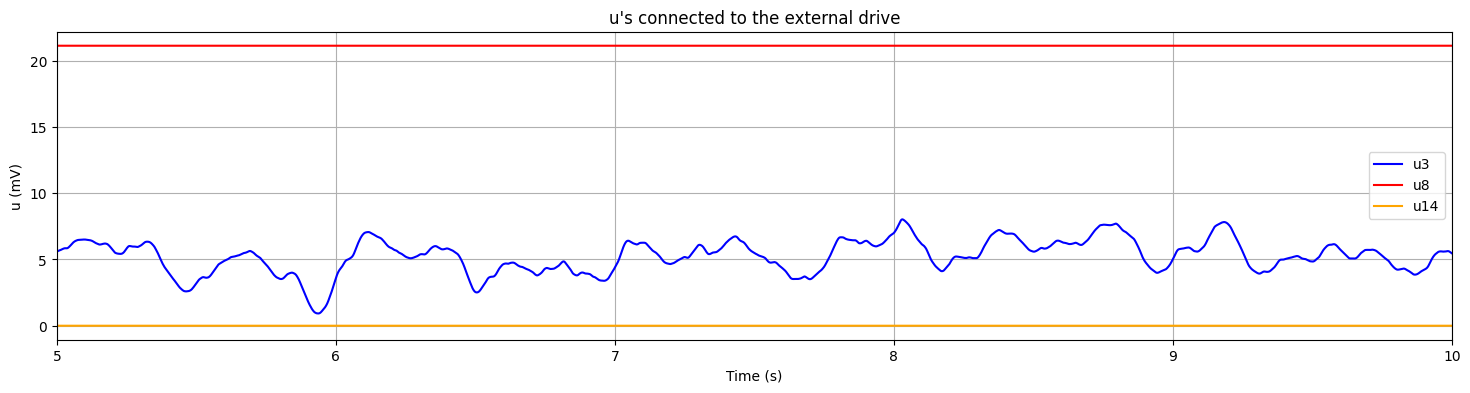

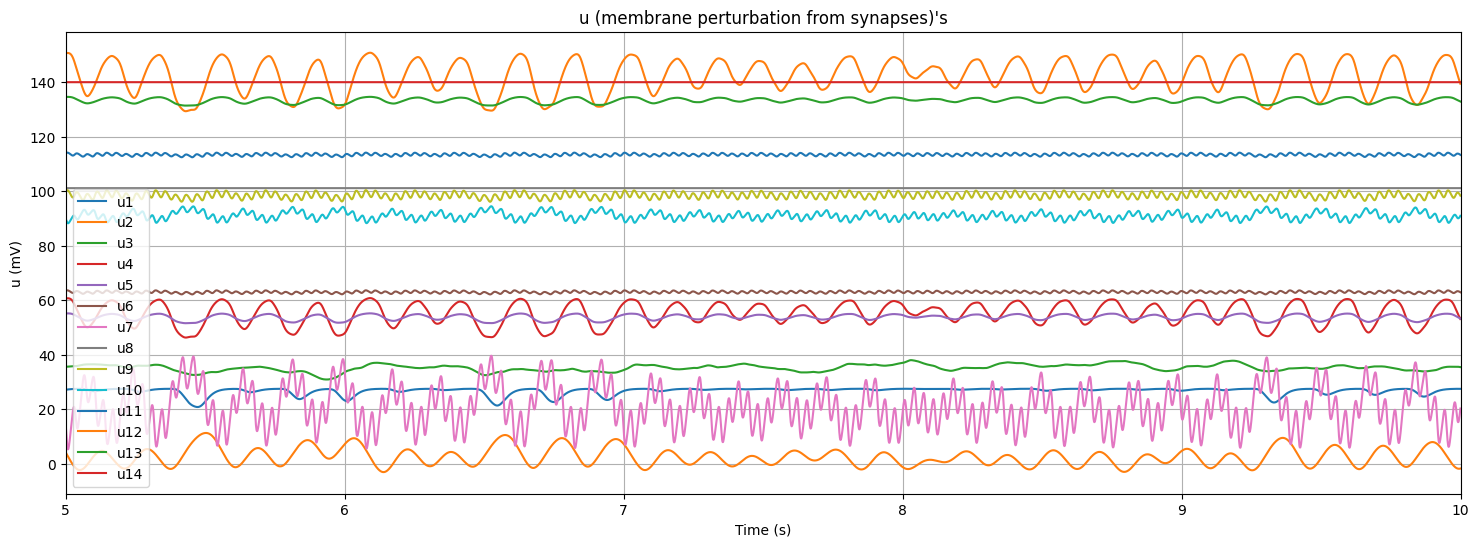

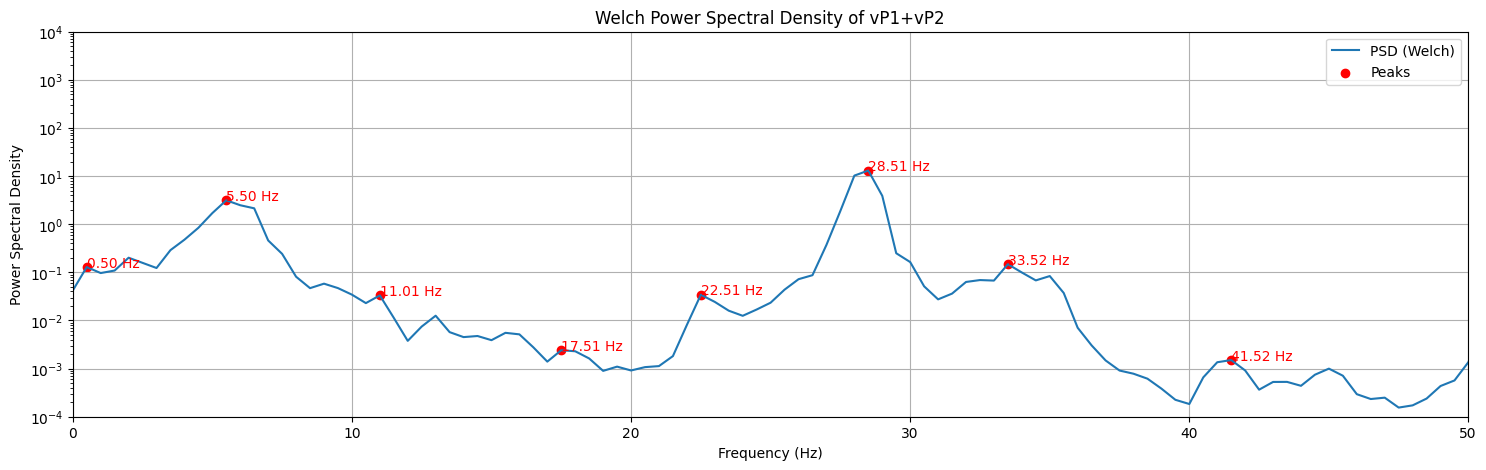

In [17]:
# Let's create a demo of how to run a simulation with an am signal and then plot the results, 
# peak frequency, and spectrum.


warp=0.6
warp_fast = 0.7


intrinsic_params = {
        'A_AMPA': 3.25,
        'a_AMPA': 100.0 * warp,
        'A_GABA_slow': -22.0,
        'a_GABA_slow': 50.0 * warp,
        'A_GABA_fast': -30.0,
        'a_GABA_fast': 220.0 *warp_fast,
        'C_vals': {
            1: 108.0,
            2: 33.7,
            3: 1.0,       # External drive for P1 is injected here.
            4: 135.0,
            5: 33.75,
            6: 70.0,
            7: 550.0,
            8: 1.0,       # External drive for P2 is injected here.
            9: 200.0,
            10: 100.0,
            11: 80.0,
            12: 200.0,
            13: 30.0,
            14: 1.0       # External drive for PV is injected here.
        },
        'syn_types': {
            1: 'AMPA',
            2: 'GABA_slow',
            3: 'AMPA',
            4: 'AMPA',
            5: 'AMPA',
            6: 'AMPA',
            7: 'GABA_fast',
            8: 'AMPA',
            9: 'AMPA',
            10: 'GABA_fast',
            11: 'AMPA',
            12: 'AMPA',
            13: 'AMPA',
            14: 'AMPA'
        },
        'v0_default': 6.0,
        'v0_p2': 1.0,
        'fmax': 5.0 * warp,
        'r_slope': 0.56,
        'include_PV_drive': True
    }

driving_params = configure_driving_params(e1_config='multiscale')
driving_params['e1']['mu']=100
driving_params['e2']['mu']=390

# run the simulation
sim_results = run_unified_simulation(intrinsic_params, driving_params, tmax=10.0, dt=0.001, discard=1.0)

# create a directory to save the results with a timestamped name
# then save the driving params and intrinsic params to a file and 
# then plot the figures and save them too to the folder
import os
from datetime import datetime
import json

# Create timestamped directory name
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
results_dir = f'results_{timestamp}'

# Create directory
os.makedirs(results_dir, exist_ok=True)

# Save parameters to JSON files
params_to_save = {
    'intrinsic_params': intrinsic_params,
    'driving_params': driving_params
}

for param_name, param_dict in params_to_save.items():
    param_file = os.path.join(results_dir, f'{param_name}.json')
    with open(param_file, 'w') as f:
        json.dump(param_dict, f, indent=4)

# Plot and save figures
plot_sim_results(sim_results, save_path=os.path.join(results_dir, ''), show=True)


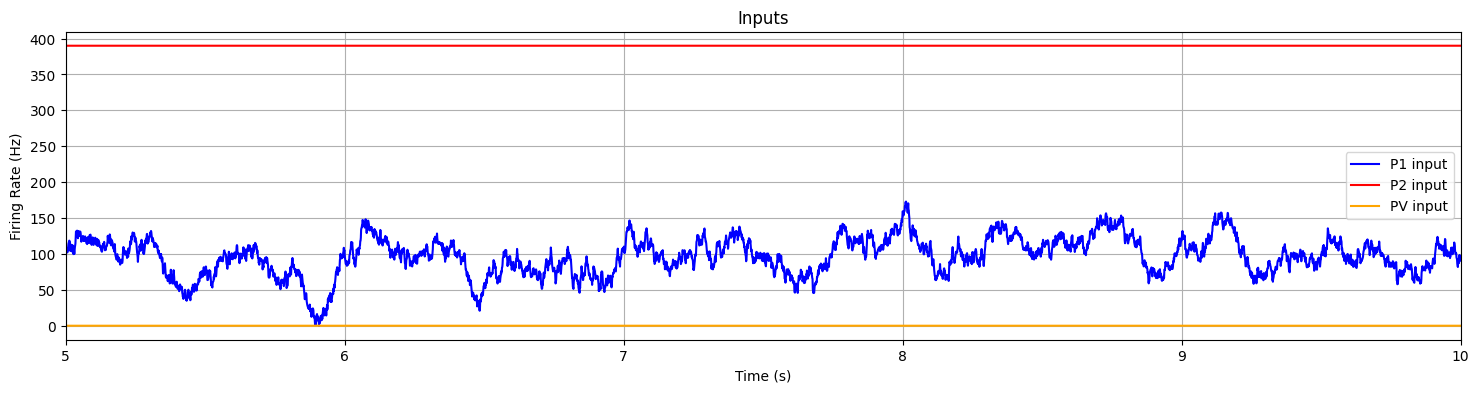

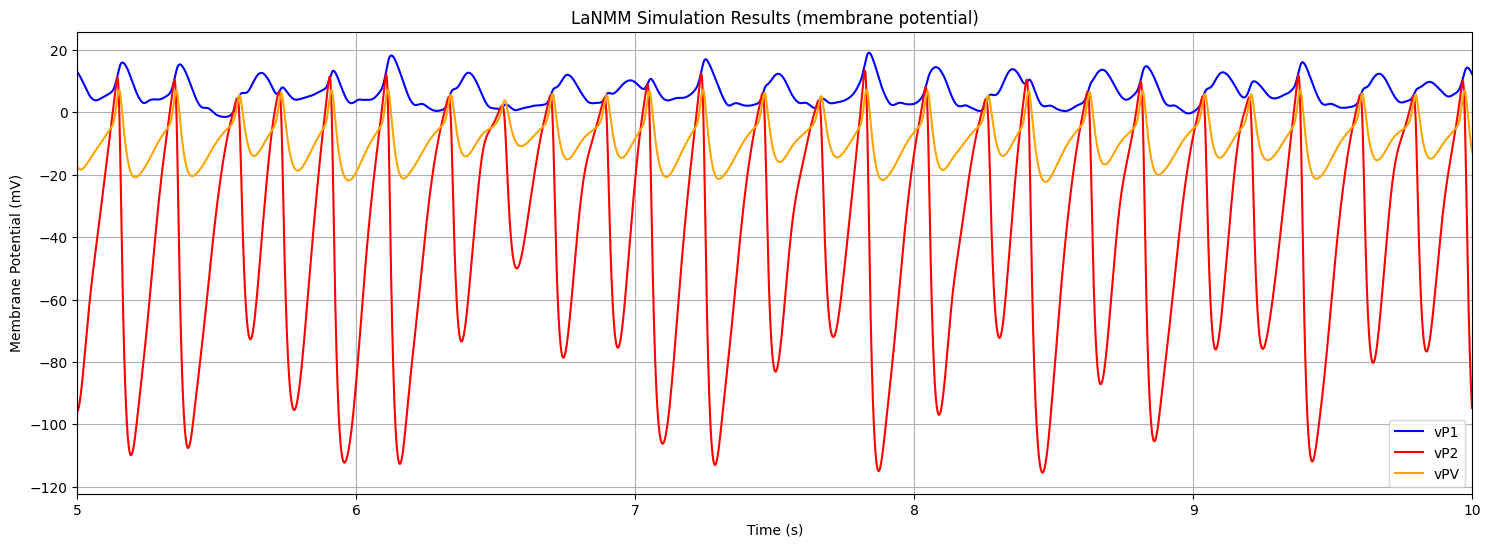

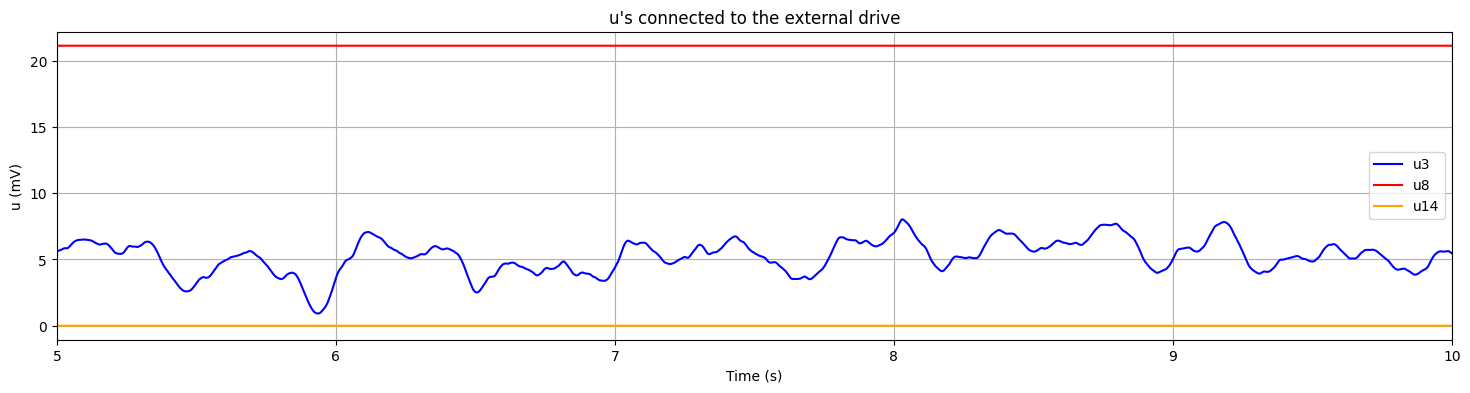

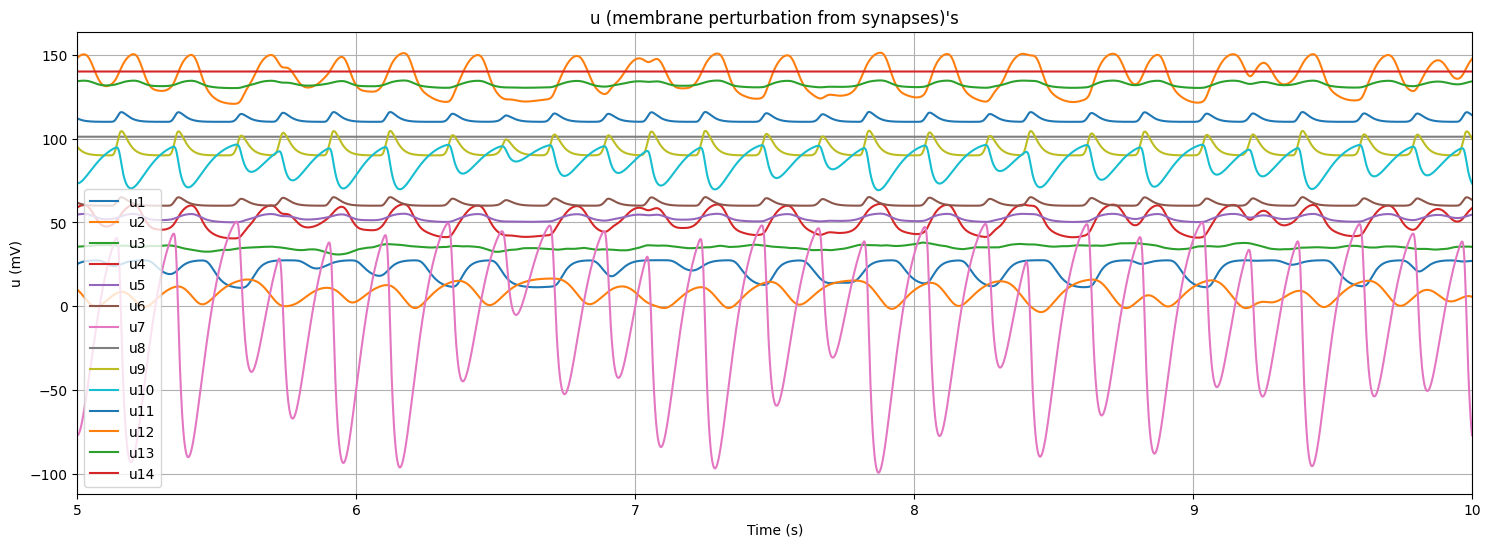

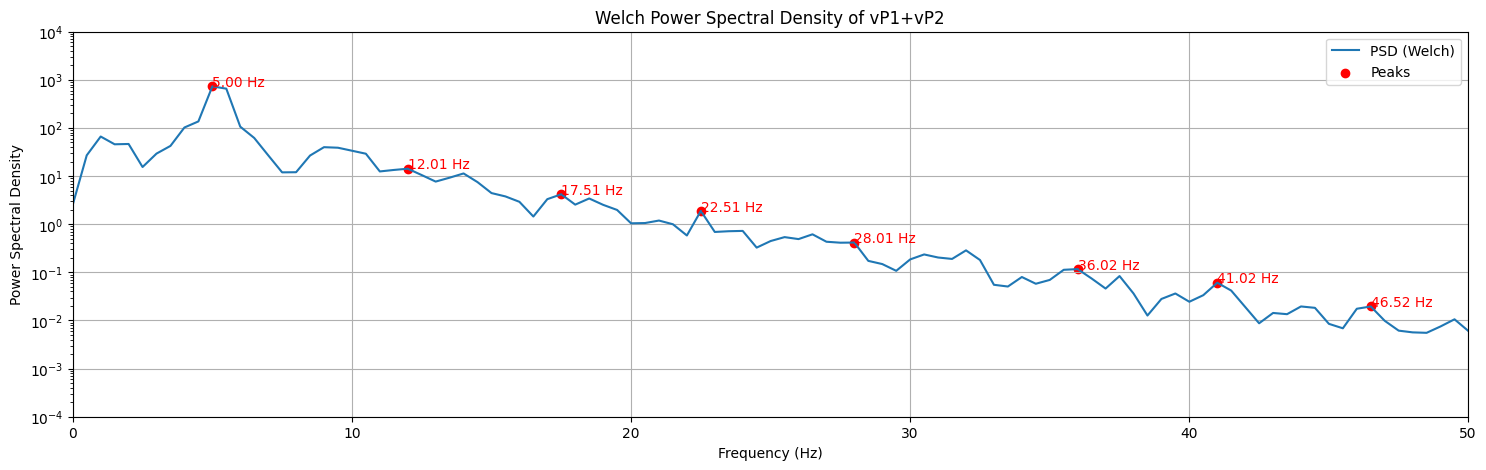

In [18]:
# Let's create a demo of how to run a simulation with an am signal and then plot the results, 
# peak frequency, and spectrum.


warp=0.6
warp_fast = 0.1


intrinsic_params = {
        'A_AMPA': 3.25,
        'a_AMPA': 100.0 * warp,
        'A_GABA_slow': -22.0,
        'a_GABA_slow': 50.0 * warp,
        'A_GABA_fast': -30.0,
        'a_GABA_fast': 220.0 *warp_fast,
        'C_vals': {
            1: 108.0,
            2: 33.7,
            3: 1.0,       # External drive for P1 is injected here.
            4: 135.0,
            5: 33.75,
            6: 70.0,
            7: 550.0,
            8: 1.0,       # External drive for P2 is injected here.
            9: 200.0,
            10: 100.0,
            11: 80.0,
            12: 200.0,
            13: 30.0,
            14: 1.0       # External drive for PV is injected here.
        },
        'syn_types': {
            1: 'AMPA',
            2: 'GABA_slow',
            3: 'AMPA',
            4: 'AMPA',
            5: 'AMPA',
            6: 'AMPA',
            7: 'GABA_fast',
            8: 'AMPA',
            9: 'AMPA',
            10: 'GABA_fast',
            11: 'AMPA',
            12: 'AMPA',
            13: 'AMPA',
            14: 'AMPA'
        },
        'v0_default': 6.0,
        'v0_p2': 1.0,
        'fmax': 5.0 * warp,
        'r_slope': 0.56,
        'include_PV_drive': True
    }

driving_params = configure_driving_params(e1_config='multiscale')
driving_params['e1']['mu']=100
driving_params['e2']['mu']=390

# run the simulation
sim_results = run_unified_simulation(intrinsic_params, driving_params, tmax=10.0, dt=0.001, discard=1.0)

# create a directory to save the results with a timestamped name
# then save the driving params and intrinsic params to a file and 
# then plot the figures and save them too to the folder
import os
from datetime import datetime
import json

# Create timestamped directory name
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
results_dir = f'results_{timestamp}'

# Create directory
os.makedirs(results_dir, exist_ok=True)

# Save parameters to JSON files
params_to_save = {
    'intrinsic_params': intrinsic_params,
    'driving_params': driving_params
}

for param_name, param_dict in params_to_save.items():
    param_file = os.path.join(results_dir, f'{param_name}.json')
    with open(param_file, 'w') as f:
        json.dump(param_dict, f, indent=4)

# Plot and save figures
plot_sim_results(sim_results, save_path=os.path.join(results_dir, ''), show=True)


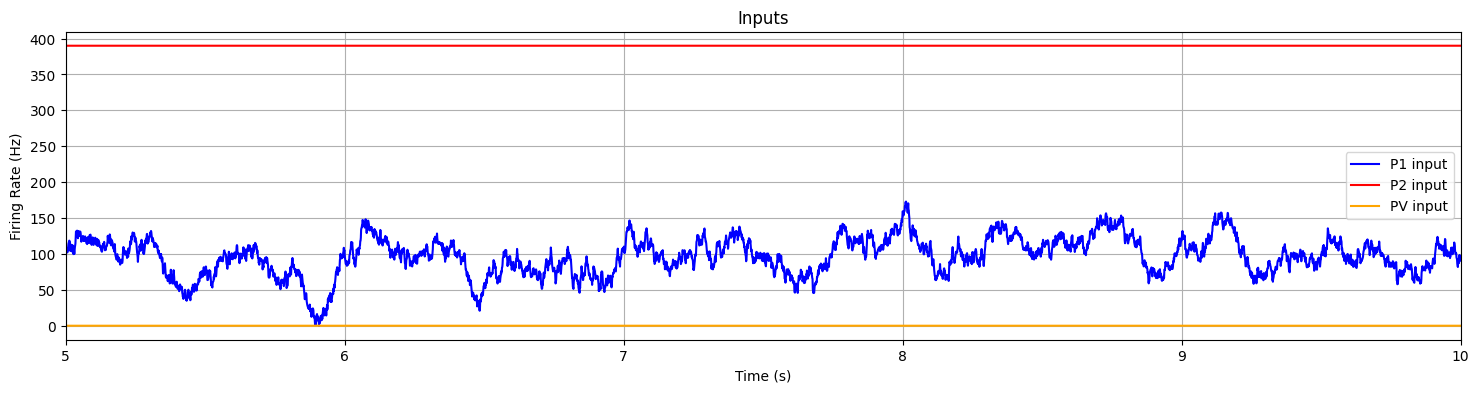

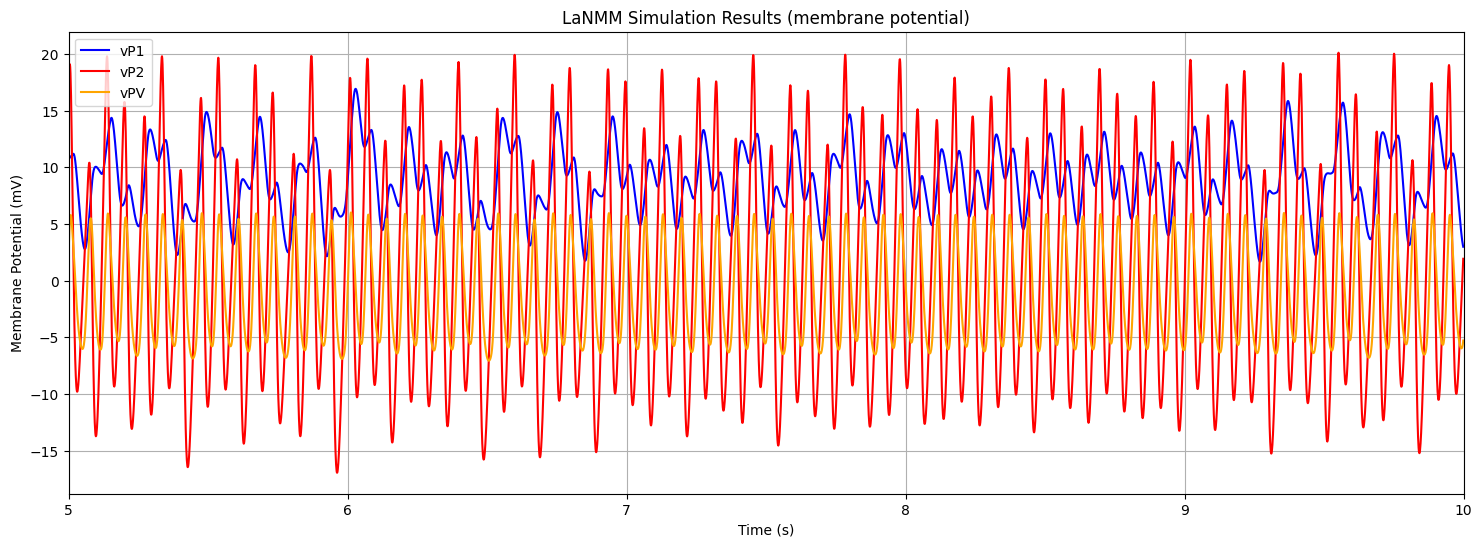

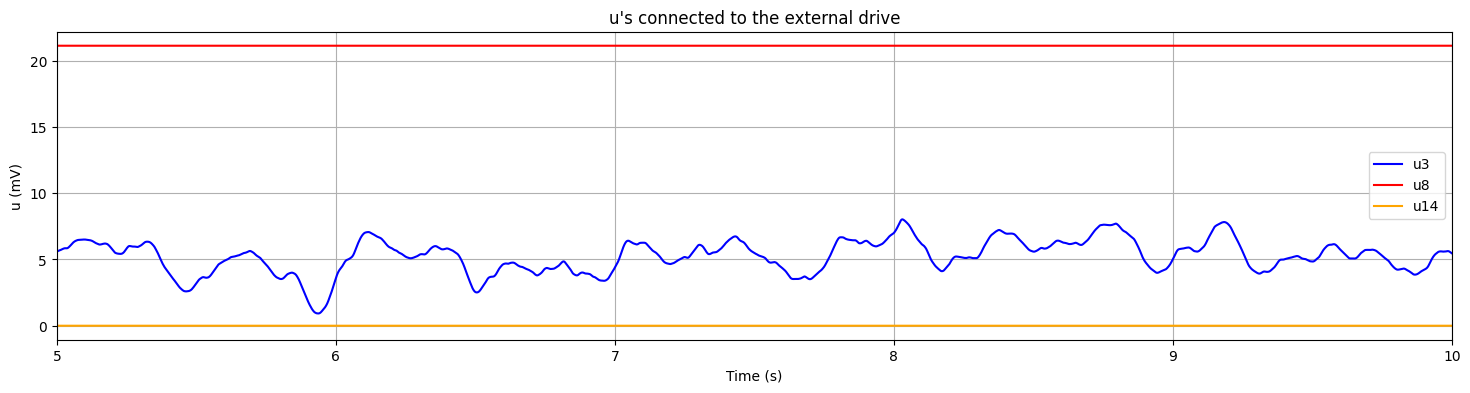

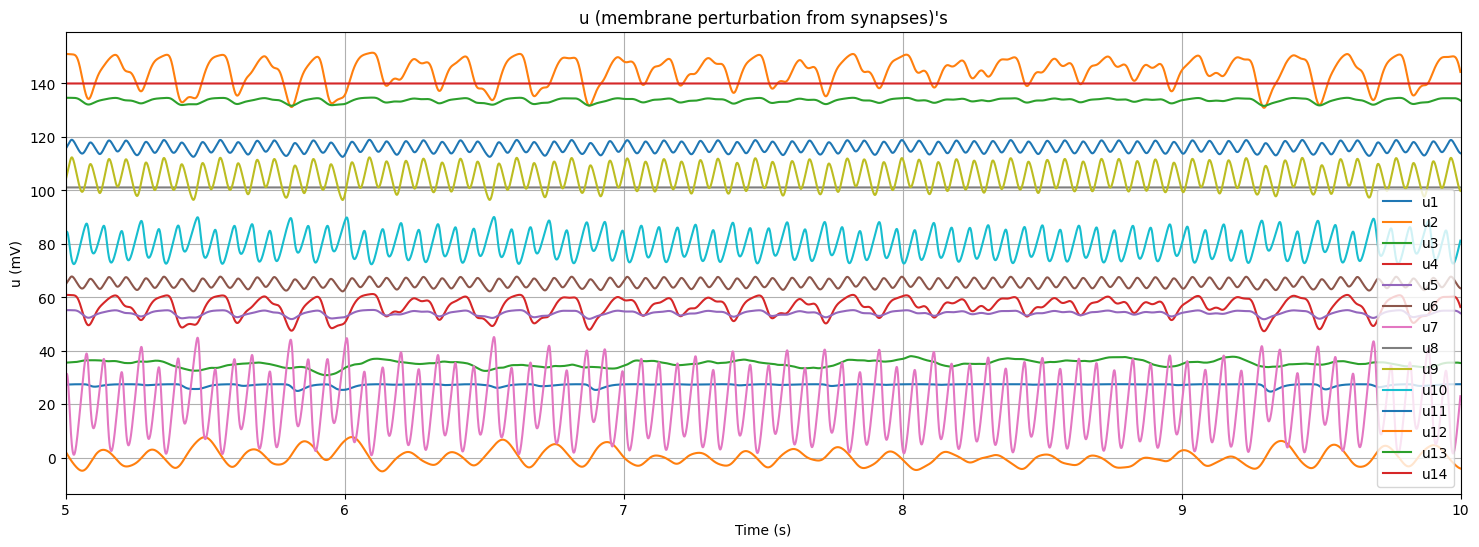

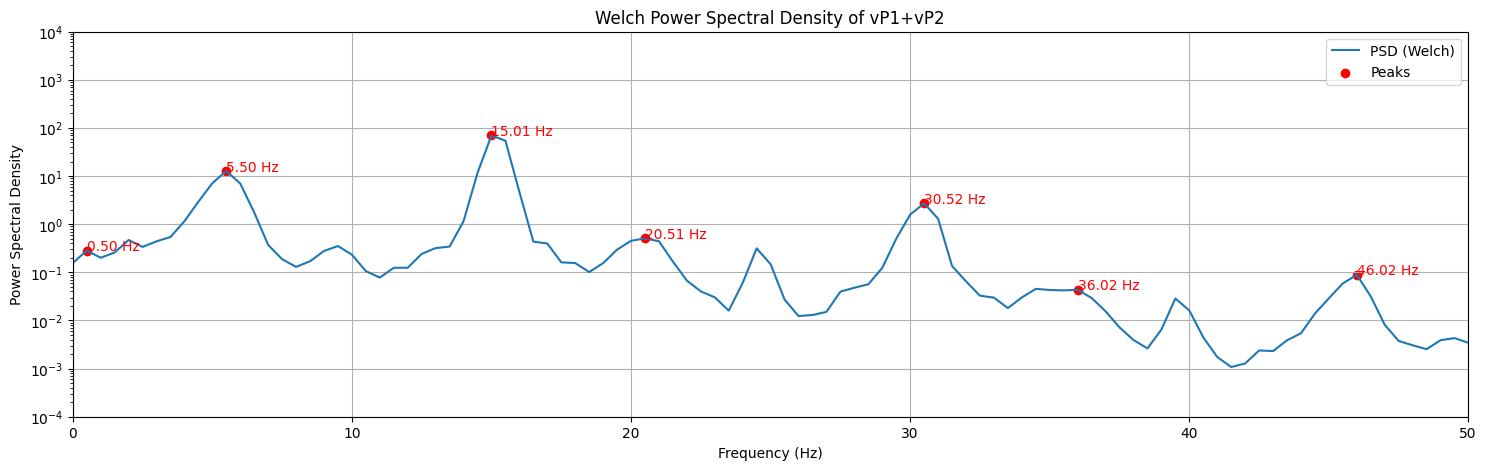

In [19]:
# Let's create a demo of how to run a simulation with an am signal and then plot the results, 
# peak frequency, and spectrum.


warp=0.6
warp_fast = 0.2


intrinsic_params = {
        'A_AMPA': 3.25,
        'a_AMPA': 100.0 * warp,
        'A_GABA_slow': -22.0,
        'a_GABA_slow': 50.0 * warp,
        'A_GABA_fast': -30.0,
        'a_GABA_fast': 220.0 *warp_fast,
        'C_vals': {
            1: 108.0,
            2: 33.7,
            3: 1.0,       # External drive for P1 is injected here.
            4: 135.0,
            5: 33.75,
            6: 70.0,
            7: 250.0,
            8: 1.0,       # External drive for P2 is injected here.
            9: 200.0,
            10: 100.0,
            11: 80.0,
            12: 200.0,
            13: 30.0,
            14: 1.0       # External drive for PV is injected here.
        },
        'syn_types': {
            1: 'AMPA',
            2: 'GABA_slow',
            3: 'AMPA',
            4: 'AMPA',
            5: 'AMPA',
            6: 'AMPA',
            7: 'GABA_fast',
            8: 'AMPA',
            9: 'AMPA',
            10: 'GABA_fast',
            11: 'AMPA',
            12: 'AMPA',
            13: 'AMPA',
            14: 'AMPA'
        },
        'v0_default': 6.0,
        'v0_p2': 1.0,
        'fmax': 5.0 * warp,
        'r_slope': 0.56,
        'include_PV_drive': True
    }

driving_params = configure_driving_params(e1_config='multiscale')
driving_params['e1']['mu']=100
driving_params['e2']['mu']=390

# run the simulation
sim_results = run_unified_simulation(intrinsic_params, driving_params, tmax=10.0, dt=0.001, discard=1.0)

# create a directory to save the results with a timestamped name
# then save the driving params and intrinsic params to a file and 
# then plot the figures and save them too to the folder
import os
from datetime import datetime
import json

# Create timestamped directory name
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
results_dir = f'results_{timestamp}'

# Create directory
os.makedirs(results_dir, exist_ok=True)

# Save parameters to JSON files
params_to_save = {
    'intrinsic_params': intrinsic_params,
    'driving_params': driving_params
}

for param_name, param_dict in params_to_save.items():
    param_file = os.path.join(results_dir, f'{param_name}.json')
    with open(param_file, 'w') as f:
        json.dump(param_dict, f, indent=4)

# Plot and save figures
plot_sim_results(sim_results, save_path=os.path.join(results_dir, ''), show=True)
